In [78]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
boston=load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
data=pd.DataFrame(data=amar.data,columns=boston.feature_names )
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
data['PRICE']=boston.target
data.head()
data.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(506, 14)

In [15]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [19]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [20]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


###  Data Exploration...

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

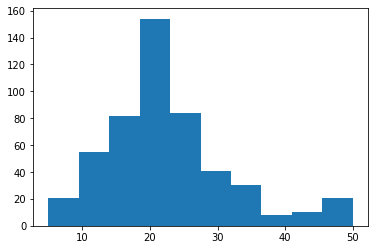

In [22]:
plt.hist(data['PRICE'])
plt.show()

(array([ 4.,  7., 10., 13., 12., 30., 28., 22., 32., 52., 51., 51., 50.,
        23., 11., 16., 14., 11., 15.,  6.,  9.,  6.,  1.,  1.,  3.,  4.,
         3.,  2.,  1., 18.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ,
        21.5, 23. , 24.5, 26. , 27.5, 29. , 30.5, 32. , 33.5, 35. , 36.5,
        38. , 39.5, 41. , 42.5, 44. , 45.5, 47. , 48.5, 50. ]),
 <a list of 30 Patch objects>)

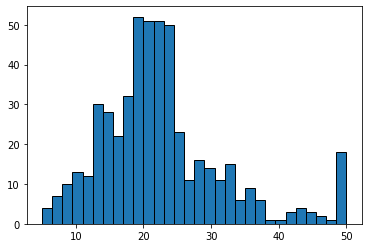

In [23]:
plt.hist(data['PRICE'], bins = 30, ec = 'black')
plt.show()

<Figure size 720x432 with 0 Axes>

(array([ 4.,  7., 10., 13., 12., 30., 28., 22., 32., 52., 51., 51., 50.,
        23., 11., 16., 14., 11., 15.,  6.,  9.,  6.,  1.,  1.,  3.,  4.,
         3.,  2.,  1., 18.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ,
        21.5, 23. , 24.5, 26. , 27.5, 29. , 30.5, 32. , 33.5, 35. , 36.5,
        38. , 39.5, 41. , 42.5, 44. , 45.5, 47. , 48.5, 50. ]),
 <a list of 30 Patch objects>)

Text(0.5, 0, "Price in 1000's")

Text(0, 0.5, 'Nr of Houses')

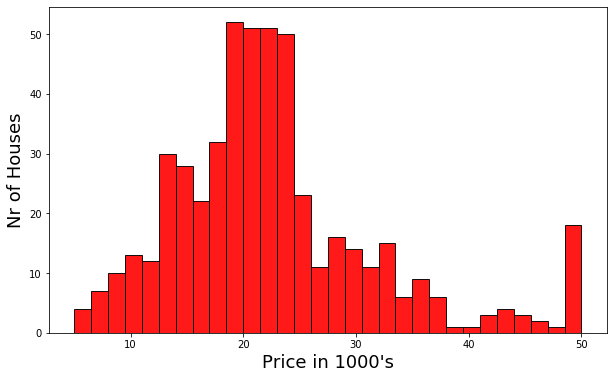

In [24]:
plt.figure(figsize= (10,6))
plt.hist(data['PRICE'], bins = 30, ec = 'black', color = 'red', alpha = 0.9)
plt.xlabel('Price in 1000\'s' ,fontsize=18)
plt.ylabel('Nr of Houses',fontsize=18)
plt.show()

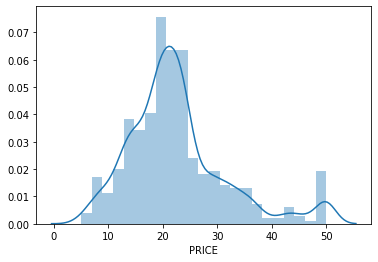

In [25]:
sns.distplot(data['PRICE'])
plt.show()

In [26]:
data['PRICE'].mean()

22.532806324110698

In [27]:
data['PRICE'].median()

21.2

<Figure size 720x576 with 0 Axes>

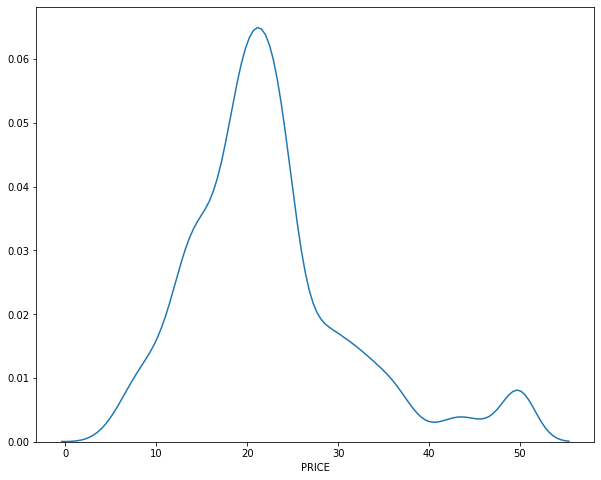

In [28]:
plt.figure(figsize =(10,8))
sns.distplot(data['PRICE'], hist=False, kde=True,)
plt.show()

<Figure size 720x576 with 0 Axes>

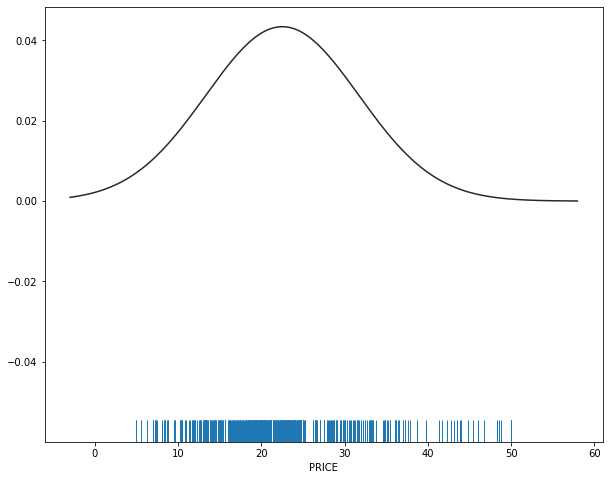

In [29]:
plt.figure(figsize =(10,8))
sns.distplot(data['PRICE'], hist=False, kde=False,rug=True,fit=norm)
plt.show()

<Figure size 720x576 with 0 Axes>

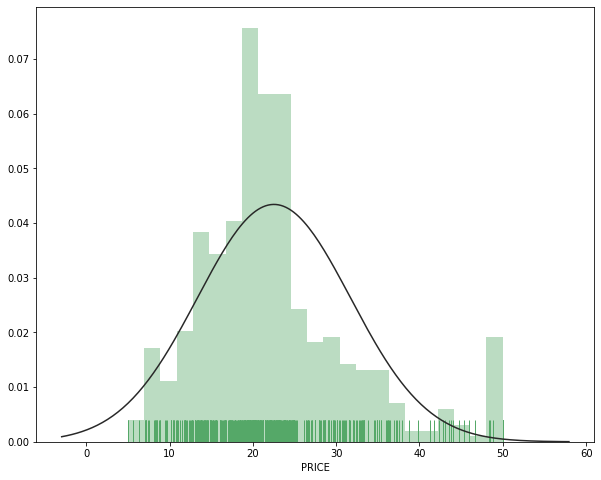

In [30]:
plt.figure(figsize =(10,8))
sns.set_color_codes()
sns.distplot(data['PRICE'], hist=True, kde=False,rug=True,fit=norm,vertical=False,color='g')
plt.show()

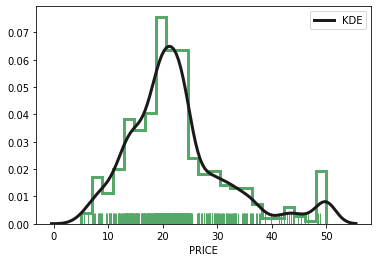

In [31]:
sns.distplot(data['PRICE'], rug=True, rug_kws={"color": "g"},
                     kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})

<Figure size 720x576 with 0 Axes>

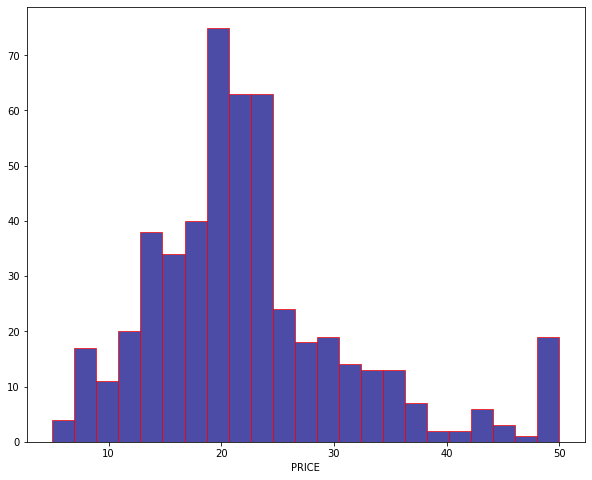

In [32]:
plt.figure(figsize =(10,8))
sns.distplot(data['PRICE'], kde=False, hist_kws={'ec': 'red', 'color':'navy', 'alpha': 0.7})
plt.show()


<Figure size 720x576 with 0 Axes>

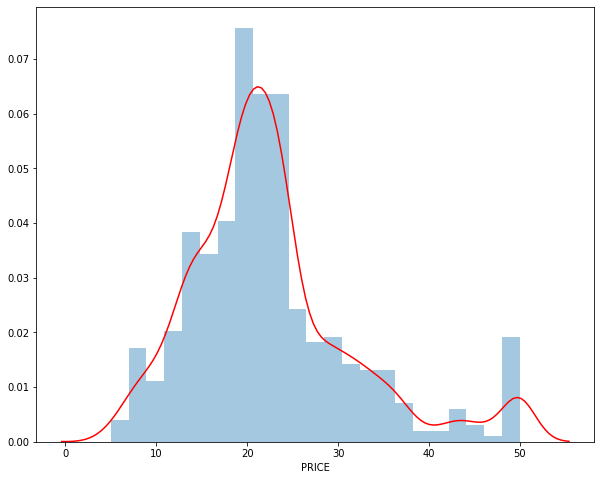

In [33]:
plt.figure(figsize =(10,8))
sns.distplot(data['PRICE'], hist=True, kde=True,kde_kws={'color' : 'red'})
plt.show()


(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <a list of 10 Patch objects>)

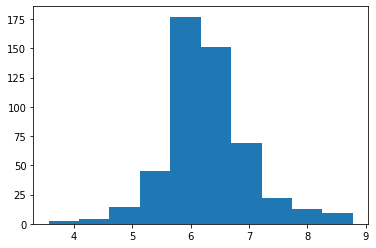

In [34]:
plt.hist(data['RM'])
plt.show()

In [35]:
data['RM'].mean()

6.284634387351787

(array([ 82., 225.,  43.,  24.,   0.,   0.,   0.,   0.,   0., 132.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

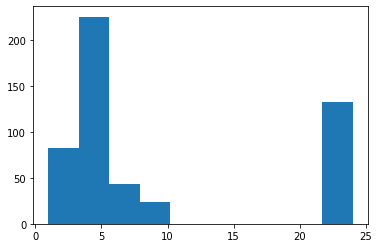

In [36]:
plt.hist(data['RAD'])
plt.show()

In [37]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [38]:
accessibility=data['RAD'].value_counts()
accessibility

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [39]:
type(accessibility)

pandas.core.series.Series

In [40]:
accessibility.values

array([132, 115, 110,  38,  26,  24,  24,  20,  17], dtype=int64)

<Figure size 720x432 with 0 Axes>

<BarContainer object of 9 artists>

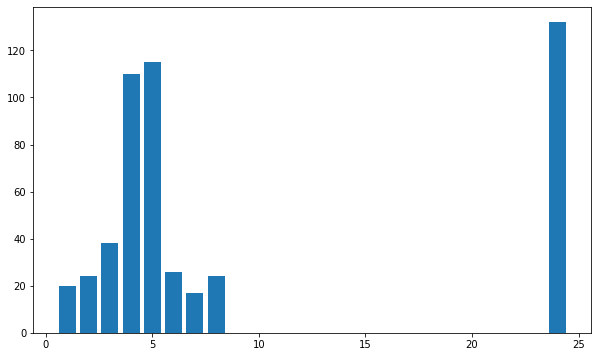

In [41]:
plt.figure(figsize= (10,6))
plt.bar(accessibility.index, accessibility )
plt.show()

In [42]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [43]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [44]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [45]:
data.mean()


CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [46]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [47]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [48]:
data['PRICE'].corr(data['RM'])

0.695359947071539

<Figure size 1008x576 with 0 Axes>

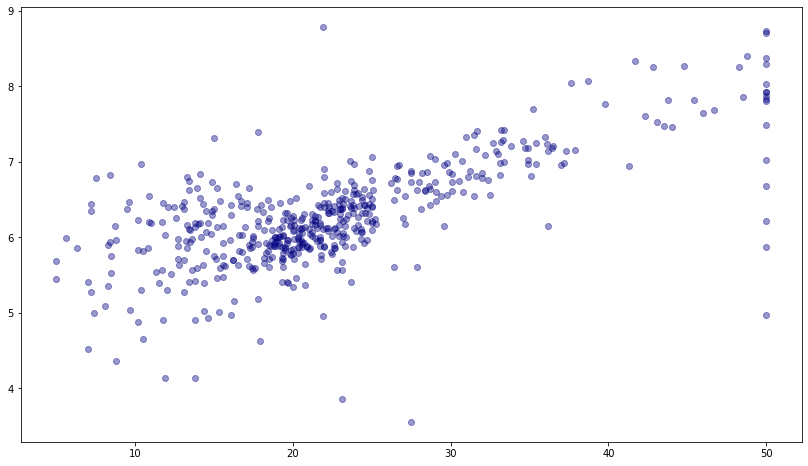

In [49]:
plt.figure(figsize =(14,8))
plt.scatter(data['PRICE'], data['RM'], color = 'navy', alpha = 0.4)
plt.show()

In [50]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

<Figure size 1008x576 with 0 Axes>

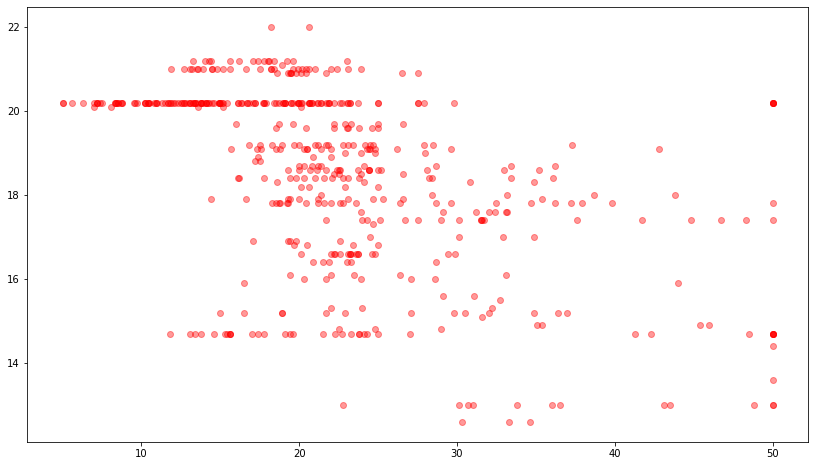

In [51]:
plt.figure(figsize =(14,8))
plt.scatter(data['PRICE'], data['PTRATIO'], color = 'red', alpha = 0.4)
plt.show()

In [52]:
data['PRICE'].corr(data['NOX'])

-0.4273207723732824

In [53]:
data['PRICE'].corr(data['DIS'])

0.24992873408590388

<Figure size 1008x576 with 0 Axes>

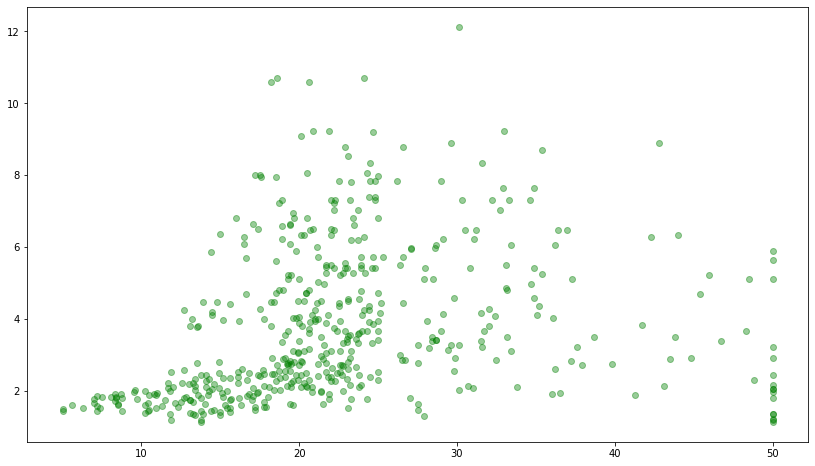

In [54]:
plt.figure(figsize =(14,8))
plt.scatter(data['PRICE'], data['DIS'], color = 'green', alpha = 0.4)
plt.show()

<Figure size 1008x576 with 0 Axes>

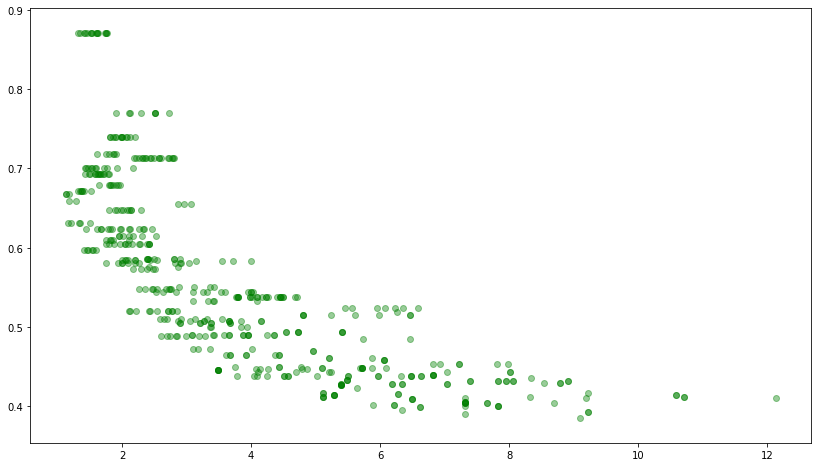

In [55]:
plt.figure(figsize =(14,8))
plt.scatter(data['DIS'], data['NOX'], color = 'green', alpha = 0.4)
plt.show()

In [56]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 1152x720 with 0 Axes>

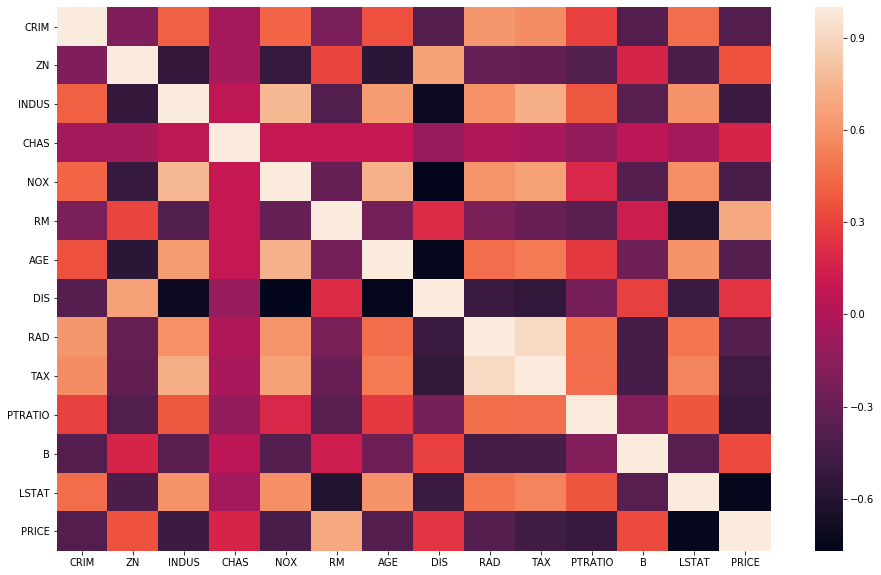

In [57]:
plt.figure(figsize = (16,10))

sns.heatmap(data.corr())

plt.show()

<Figure size 1152x720 with 0 Axes>

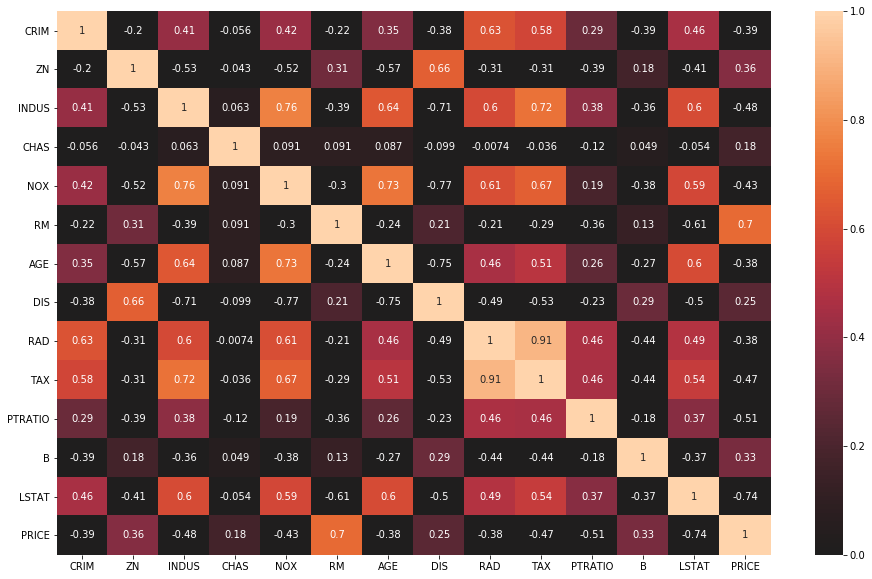

In [58]:
plt.figure(figsize = (16,10))

sns.heatmap(data.corr(), annot = True,vmin=0, vmax=1,center=0)

plt.show()

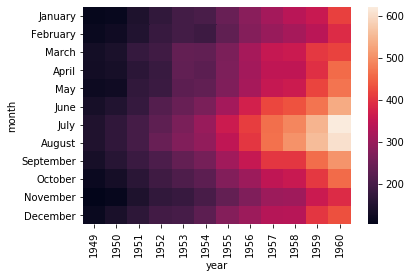

In [59]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

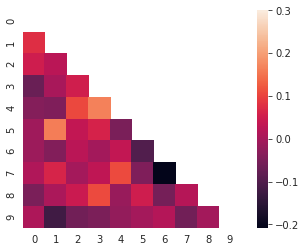

In [60]:
 corr = np.corrcoef(np.random.randn(10, 200))
 mask = np.zeros_like(corr)
 mask[np.triu_indices_from(mask)] = True
 with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

<Figure size 1152x720 with 0 Axes>

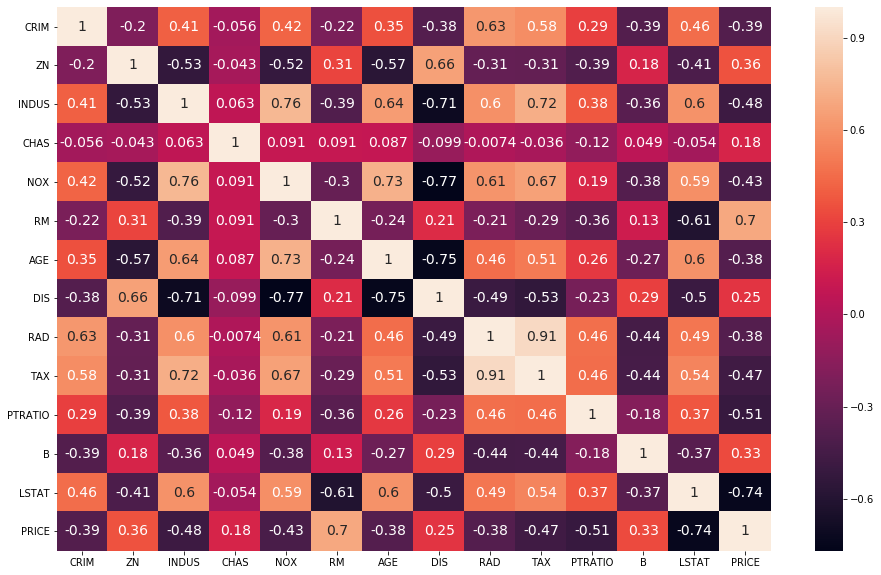

In [61]:
plt.figure(figsize = (16,10))

sns.heatmap(data.corr(), annot = True, annot_kws = {'size' : 14} )

plt.show()

In [62]:
masker=np.zeros_like(data.corr())
masker

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [63]:
triangle_indices=np.triu_indices_from(masker)
masker[triangle_indices]= True

In [64]:
masker

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<Figure size 1152x720 with 0 Axes>

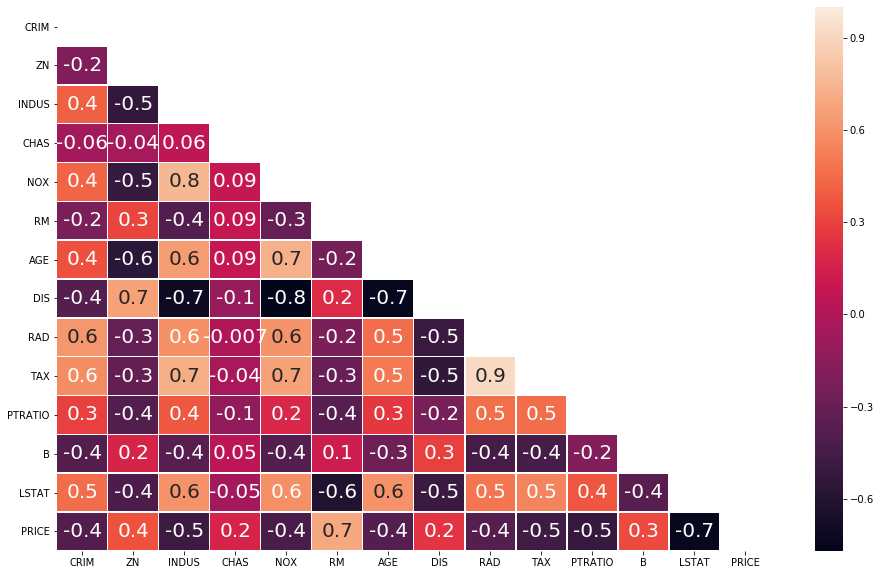

In [65]:
plt.figure(figsize = (16,10))

sns.heatmap(data.corr(), annot = True, annot_kws = {'size' : 20}, fmt = '.1g', mask = masker, linewidth = 0.6)

plt.show()

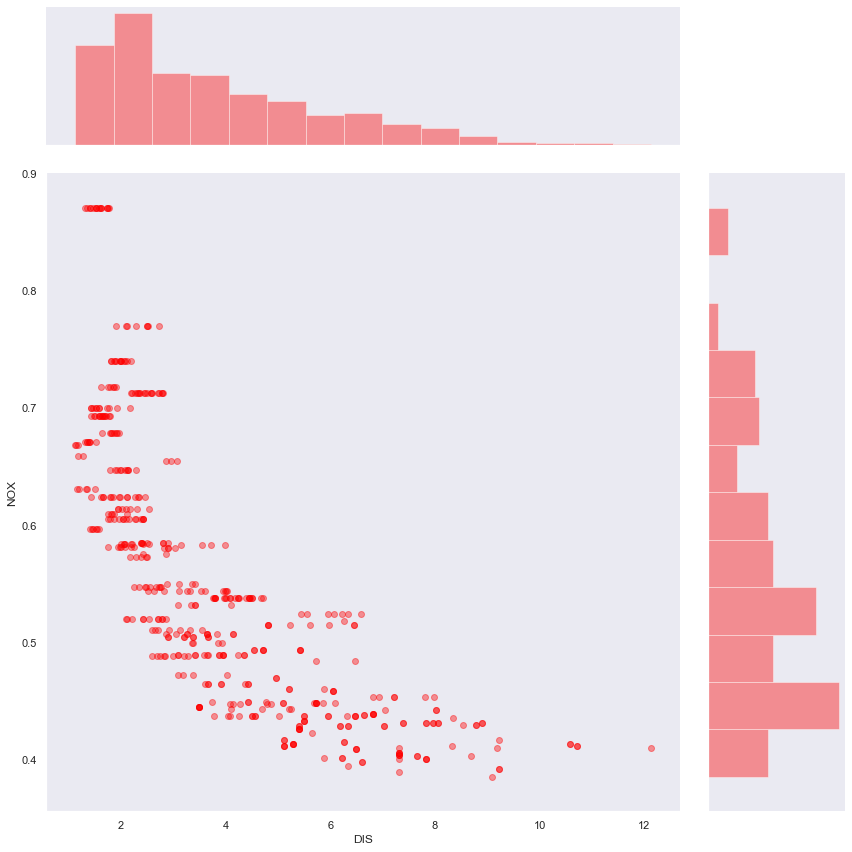

In [66]:


plt.show()
sns.set()
sns.set_style('dark')

sns.jointplot(x= data['DIS'], y = data['NOX'], height = 12, ratio=4, color = 'red', alpha = 0.4)

plt.show()

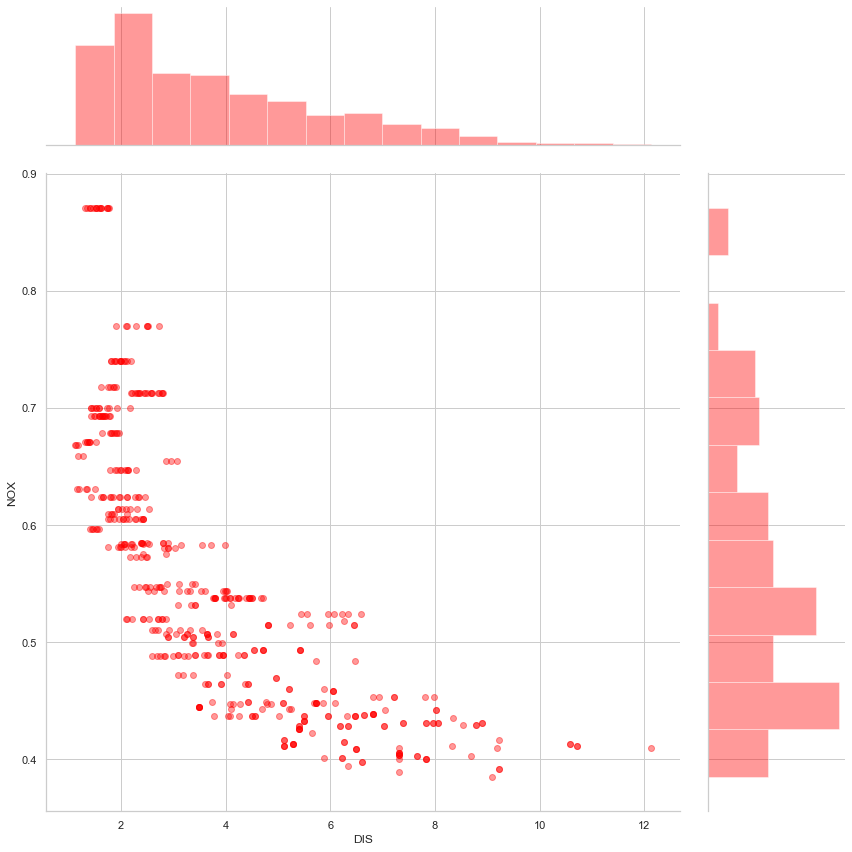

In [67]:
sns.set()

sns.set_style('whitegrid')

sns.jointplot(x= data['DIS'], y = data['NOX'], height = 12, ratio=4, color = 'red', alpha = 0.4)

plt.show()

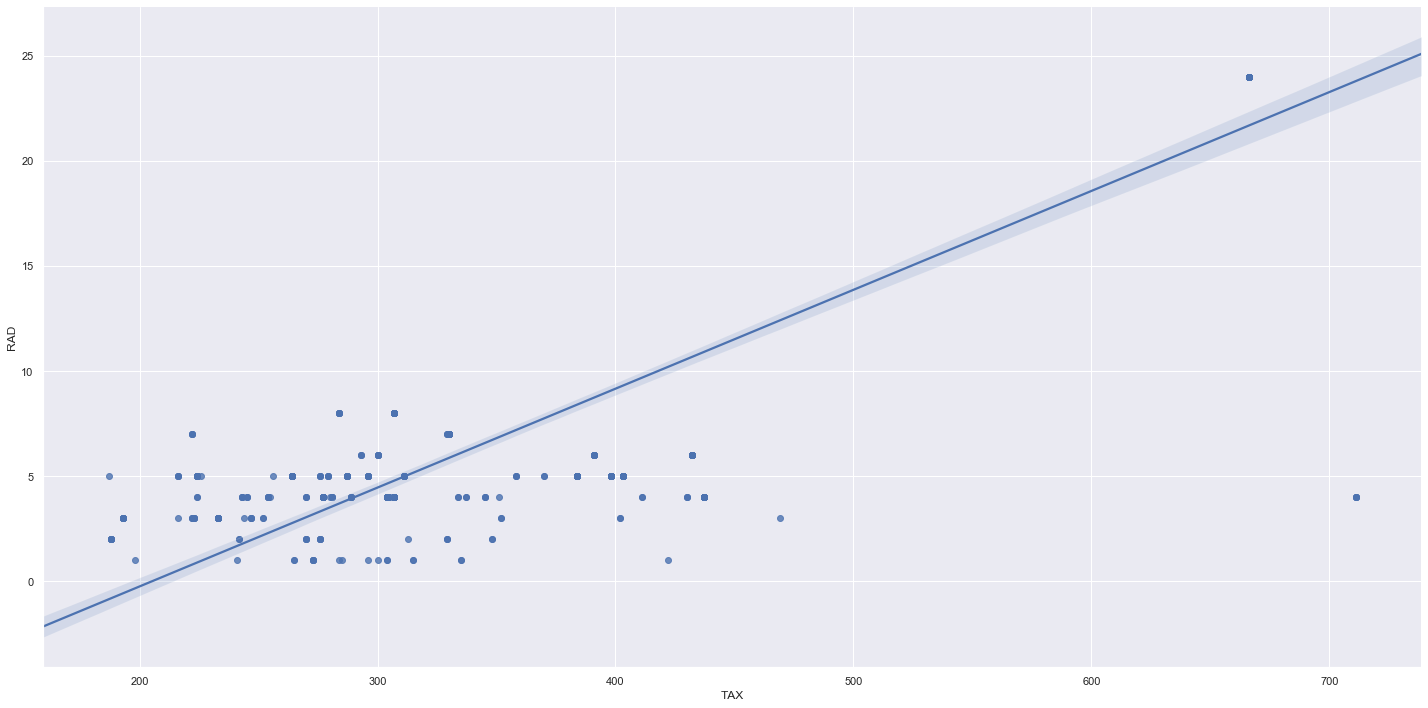

In [68]:
sns.set()

sns.lmplot(x = 'TAX', y='RAD', data = data, height=10, aspect=2)

plt.show()

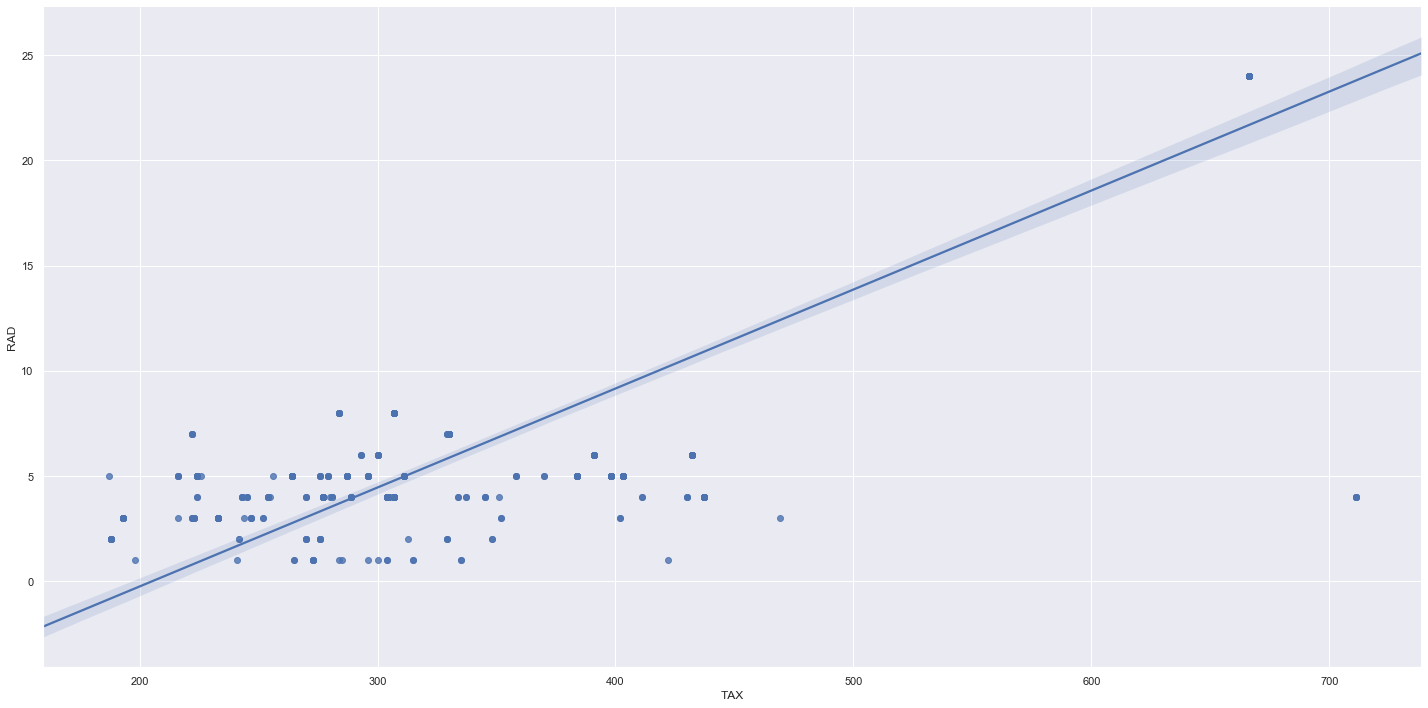

In [69]:
sns.set()

sns.lmplot(x = 'TAX', y='RAD', data = data, height=10, aspect=2)

plt.show()

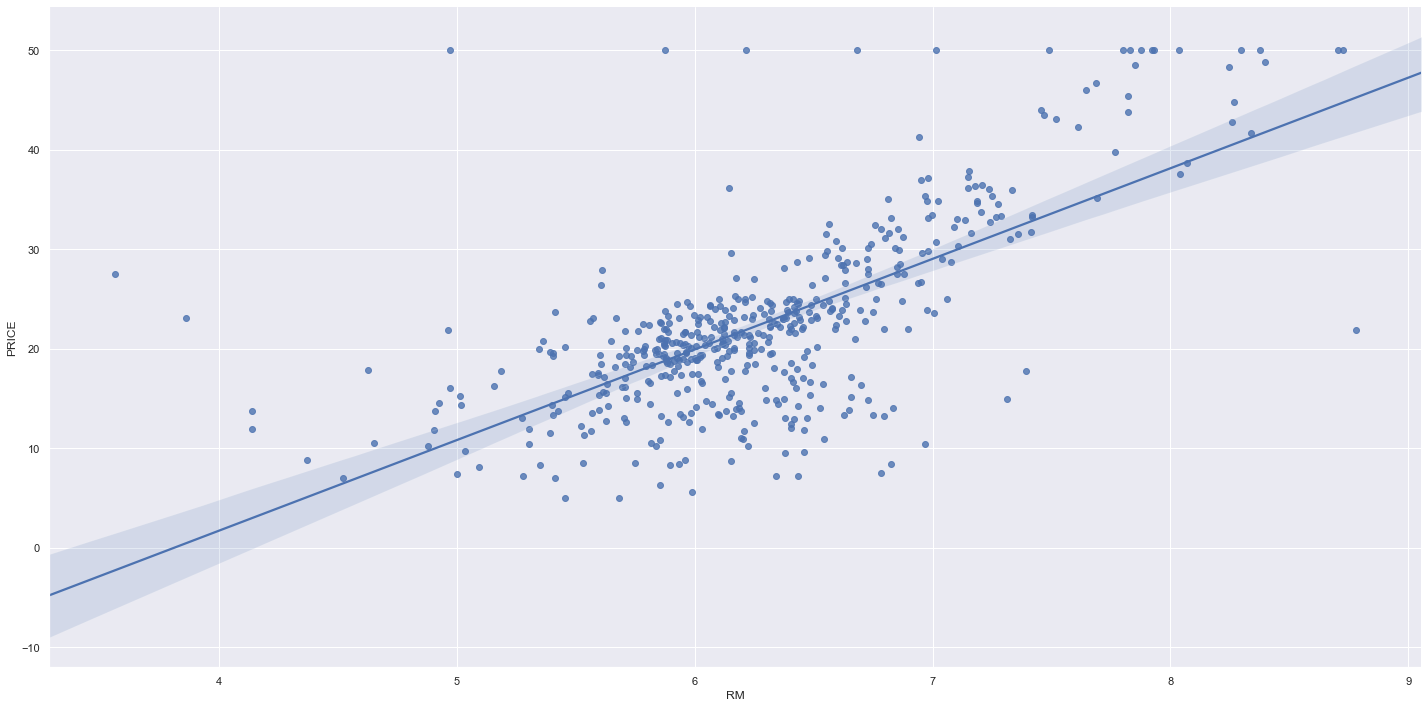

In [70]:
sns.set()

sns.lmplot(x = 'RM', y='PRICE', data = data, height=10, aspect=2)

plt.show()

 ## REGRESSION...TRAIN TEST SPLIT

In [79]:
prices = data['PRICE']

In [80]:
features = data.drop('PRICE', axis = 1)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
X_train, X_test, y_train, y_test = train_test_split(features, prices,  test_size = 0.2, random_state = 10)

In [84]:
round(len(X_train)/len(data),2)*100
round(len(X_test)/len(data),2)*100

80.0

20.0

In [89]:
X_train.head()
y_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


50     19.7
367    23.1
34     13.5
78     21.2
172    23.1
Name: PRICE, dtype: float64

In [90]:
X_test.head()
y_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28


305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
Name: PRICE, dtype: float64

# REGRESSION.....MULTIVARIABLE REGRESSION....


In [91]:
regr = LinearRegression()

In [92]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
regr.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [94]:
regr.intercept_

36.53305138282439

In [95]:
pd.DataFrame(data =regr.coef_, index = X_train.columns, columns = ['COEF'])

,COEF
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [96]:
regr.score(X_train, y_train)
regr.score(X_test, y_test)

0.750121534530608

0.6709339839115628

In [97]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<Figure size 1152x576 with 0 Axes>

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

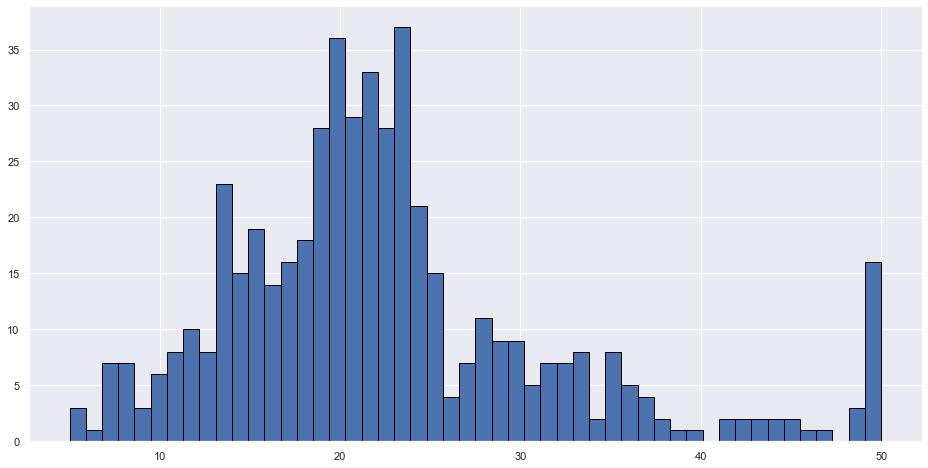

In [98]:
plt.figure(figsize =(16,8))
plt.hist(data['PRICE'], bins = 50, ec = 'black')
plt.show()

In [99]:
data['PRICE'].skew()

1.1080984082549072

In [100]:
# Data Transformation....log transformation

In [101]:
a = 20
b = 80

b-a

60

In [103]:
np.log(a)
np.log(b)
np.log(b)-np.log(a)

2.995732273553991

4.382026634673881

1.3862943611198904

In [105]:
#  I am using the above Technique to reduce the skew 


In [106]:
y_log = np.log(data['PRICE'])

In [108]:
y_log.skew()
data['PRICE'].skew()

-0.33032129530987864

1.1080984082549072

<Figure size 1152x576 with 0 Axes>

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

(array([ 2.,  0.,  1.,  0.,  0.,  1.,  0.,  5.,  2.,  0.,  1.,  6.,  3.,
         1.,  2.,  5.,  5.,  2.,  7.,  4., 10., 12., 16., 12., 13., 10.,
        14., 16., 25., 35., 34., 30., 34., 41., 33.,  4., 10., 16., 13.,
         9., 11.,  8., 13.,  7.,  1.,  2.,  5.,  4.,  2., 19.]),
 array([1.60943791, 1.65548961, 1.70154132, 1.74759302, 1.79364472,
        1.83969642, 1.88574812, 1.93179983, 1.97785153, 2.02390323,
        2.06995493, 2.11600663, 2.16205833, 2.20811004, 2.25416174,
        2.30021344, 2.34626514, 2.39231684, 2.43836855, 2.48442025,
        2.53047195, 2.57652365, 2.62257535, 2.66862706, 2.71467876,
        2.76073046, 2.80678216, 2.85283386, 2.89888556, 2.94493727,
        2.99098897, 3.03704067, 3.08309237, 3.12914407, 3.17519578,
        3.22124748, 3.26729918, 3.31335088, 3.35940258, 3.40545428,
        3.45150599, 3.49755769, 3.54360939, 3.58966109, 3.63571279,
        3.6817645 , 3.7278162 , 3.7738679 , 3.8199196 , 3.8659713 ,
        3.91202301]),
 <a list of 50

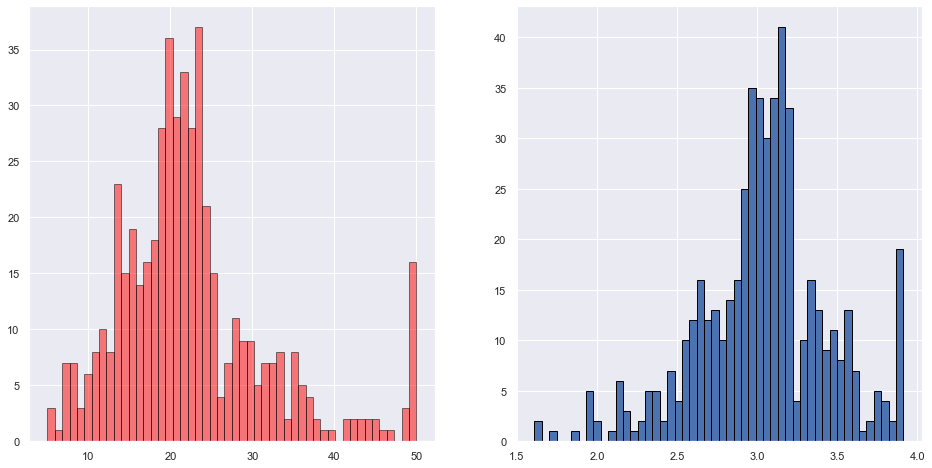

In [109]:
plt.figure(figsize= (16,8))

plt.subplot(1,2,1)
plt.hist(data['PRICE'], bins = 50, ec = 'black', color = 'red', alpha = 0.5)

plt.subplot(1,2,2)
plt.hist(y_log, bins = 50, ec = 'black')


plt.show()

In [110]:
#  doing a regression with the log prices...


In [112]:
log_prices = np.log(data['PRICE'])
features = data.drop(['PRICE'], axis =1)
log_prices.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [113]:
features.head()
features.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(506, 13)

In [114]:
X_train, X_test, y_train, y_test =train_test_split(features, log_prices, test_size = 0.2, random_state = 10)
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
regr.coef_
regr.intercept_
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef with Log prices'])


array([-1.06717261e-02,  1.57929102e-03,  2.02989827e-03,  8.03305301e-02,
       -7.04068057e-01,  7.34044072e-02,  7.63301755e-04, -4.76332789e-02,
        1.45651350e-02, -6.44998303e-04, -3.47947628e-02,  5.15896157e-04,
       -3.13900565e-02])

4.05994387177519

,coef with Log prices
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [116]:
regr.score(X_train, y_train)
regr.score(X_test, y_test)


0.7930234826697583

0.7446922306260724

In [117]:
# The Regression with the log prices are better in terms of the scores....

In [119]:
# 1. hypothesis testing...statistical significance...p value
# 2. Multicollinearity.....VIF..variance inflation factor
# 3. BIC....Bayesian information criterion...overlearning...
# statsmodels
# using statsmodel ..we can do regression also..

# 1. Hypothesis testing


In [120]:
y_train.head() # endog
X_train.head() # exog

50     2.980619
367    3.139833
34     2.602690
78     3.054001
172    3.139833
Name: PRICE, dtype: float64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


In [121]:
X_incl_constant=sm.add_constant(X_train)
X_incl_constant.head()

C:\Users\REDDAPPA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


In [122]:
# results_1 = sm.OLS(y_train, X_train.assign(const=1)).fit()
# results_1 = sm.OLS(y_train, X_incl_constant).fit()


In [124]:
results_1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
results_1.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [125]:
results_1.pvalues


const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

In [126]:
round(results_1.pvalues,3) # p>0.05 is a problem


const      0.000
CRIM       0.000
ZN         0.009
INDUS      0.445
CHAS       0.038
NOX        0.000
RM         0.000
AGE        0.209
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [127]:
# INDUS AND AGE HAVE ISSUES...

pd.DataFrame({'coef': results_1.params, 'p-value': round(results_1.pvalues,3)})


,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [128]:
variance_inflation_factor(exog=sm.add_constant(X_train).values, exog_idx= 10)

8.508856493040817

In [129]:
for i in range(len(X_incl_constant.columns)):
    
    print(variance_inflation_factor(exog=sm.add_constant(X_train).values, exog_idx= i))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [130]:
# Printing the VIF ( check for Multicollinearity) without taking the constant
for i in range(len(X_incl_constant.columns)-1):
    
    print(variance_inflation_factor(exog=sm.add_constant(X_train).values, exog_idx= i+1))

1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [131]:
vif = []

for i in range(1,len(sm.add_constant(X_train).columns)):
    
    
    vif.append(variance_inflation_factor(exog =  sm.add_constant(X_train).values, exog_idx = i))
    
vif

[1.7145250443932485,
 2.3328224265597584,
 3.943448822674636,
 1.0788133385000578,
 4.410320817897635,
 1.8404053075678568,
 3.3267660823099408,
 4.222923410477865,
 7.314299817005058,
 8.508856493040817,
 1.839911632651406,
 1.3386713255364715,
 2.812544292793034]

In [132]:
pd.DataFrame({'Coef_name' : sm.add_constant(X_train).drop(['const'], axis = 1).columns, 'VIF': np.round(vif,2)})

,Coef_name,VIF
0,CRIM,1.71
1,ZN,2.33
2,INDUS,3.94
3,CHAS,1.08
4,NOX,4.41
5,RM,1.84
6,AGE,3.33
7,DIS,4.22
8,RAD,7.31
9,TAX,8.51


In [133]:
# BIC....just a number....for comparision..you have to take the model with the lower / lowest BIC
# Bayesian information Criterion...is a measure of overfitting...
# eg...model_1 BIC = 128, model_2, BIC = 98, model_3 ..BIC = 108....choose the model with the lowest BIC

In [134]:
results_1.bic
results_1.rsquared

-139.74997769478875

0.7930234826697582

In [135]:
# Summary of the results....with all features and log prices..

In [136]:
results_1.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [137]:
round(results_1.pvalues,3)


const      0.000
CRIM       0.000
ZN         0.009
INDUS      0.445
CHAS       0.038
NOX        0.000
RM         0.000
AGE        0.209
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [138]:
results_1.bic

-139.74997769478875

In [139]:
results_1.rsquared

0.7930234826697582

In [140]:
# Next model..I am dropping INDUS...why?....higher p value > 0.05

In [141]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis =1)
model = sm.OLS(y_train, X_incl_const)
results_2 = model.fit()

In [142]:
results_2.params

const      4.056231
CRIM      -0.010721
ZN         0.001551
CHAS       0.082795
NOX       -0.673365
RM         0.071739
AGE        0.000766
DIS       -0.049394
RAD        0.014014
TAX       -0.000596
PTRATIO   -0.034126
B          0.000511
LSTAT     -0.031262
dtype: float64

In [143]:
round(results_2.pvalues,3)

const      0.000
CRIM       0.000
ZN         0.010
CHAS       0.032
NOX        0.000
RM         0.000
AGE        0.207
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [147]:
results_2.bic # BIC is lower than the model with all features and log prices...loks like this one is better
results_2.rsquared

-145.14508855591163

0.7927126289415163

In [148]:
# Next model..I am dropping INDUS and AGE...why?....both have higher p value > 0.05

In [149]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis =1)
model = sm.OLS(y_train, X_incl_const)
results_3 = model.fit()

In [151]:
round(results_3.pvalues,3)

const      0.000
CRIM       0.000
ZN         0.014
CHAS       0.025
NOX        0.000
RM         0.000
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [152]:
results_3.bic # wow this looks even better...
results_3.rsquared # remains the same for all the three models...


-149.49934294224656

0.7918657661852815

In [153]:
print(f'BIC WITH ALL::   {results_1.bic}: W/O INDUS {results_2.bic}: W/O INDUS AND AGE {results_3.bic} ')
print(f'RSQD:: WITH ALL {(results_1.rsquared)}: W/O INDUS {results_2.rsquared}: W/O INDUS,AGE {results_3.rsquared}')


BIC WITH ALL::   -139.74997769478875: W/O INDUS -145.14508855591163: W/O INDUS AND AGE -149.49934294224656 
RSQD:: WITH ALL 0.7930234826697582: W/O INDUS 0.7927126289415163: W/O INDUS,AGE 0.7918657661852815


In [155]:
# residual plots.... any non random plot indicates have an issue


In [156]:
# taking model three and checking the residual plots..to see of they are random
# model_3.....model without indus and age

In [158]:
results_3.fittedvalues.head()
results_3.resid.head()


50     3.036761
367    2.641618
34     2.636558
78     3.010481
172    3.106591
dtype: float64

50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
dtype: float64

<Figure size 1440x432 with 0 Axes>

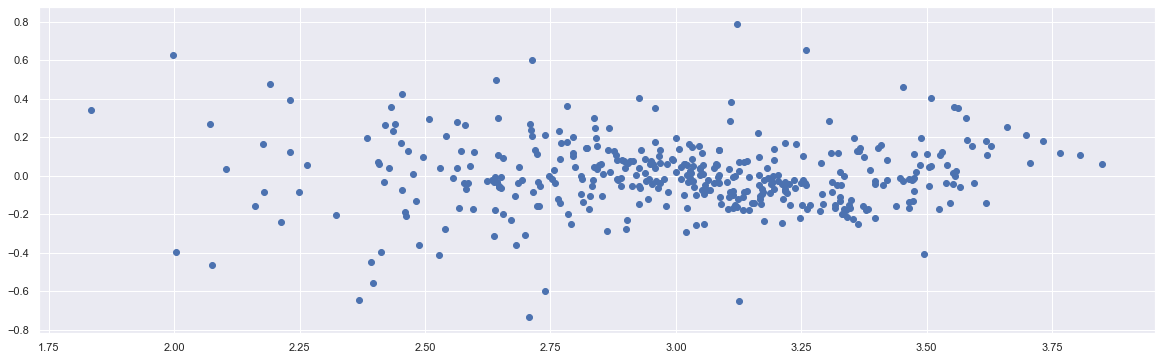

In [159]:
plt.figure(figsize = (20,6))
plt.scatter(results_3.fittedvalues,results_3.resid)
plt.show()

In [160]:
# Model_3 has residual plots ..perfectly random

In [161]:
# one more test...

# residuals should be normally distributed

# skew should be zero ideally

<Figure size 1440x432 with 0 Axes>

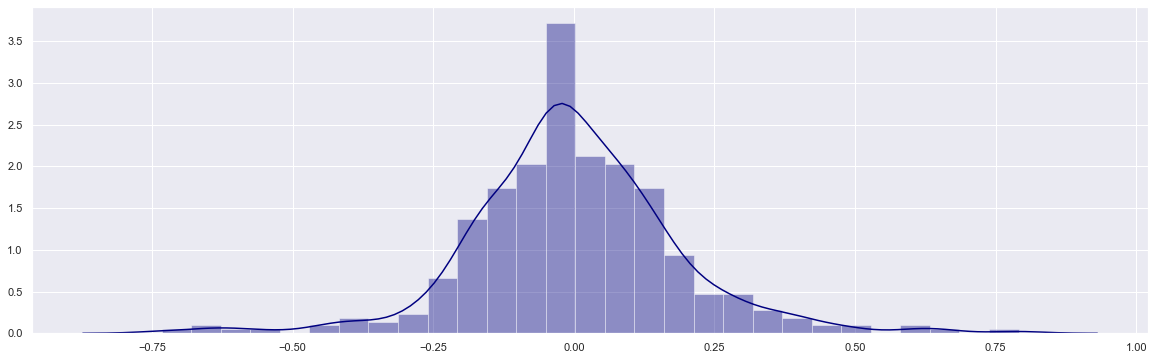

In [162]:
plt.figure(figsize =(20,6))

sns.distplot(results_3.resid, color = 'navy')
plt.show()

In [163]:
round(results_3.resid.mean(),2)

-0.0

In [164]:
round(results_3.resid.skew(),2) # close to zero..


0.12

In [165]:
# Conclusion.....we can go with model 3...the residuals are more or less normally distributed

In [167]:
#our final model below...reduced log model (we have removed indus and age)


In [168]:
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size=0.2, random_state=10)
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [169]:
results.mse_resid


0.034873370823545975

In [170]:
# RMSE...Root mean square Error

np.sqrt(results.mse_resid)

0.18674413196549436

In [171]:
# boston data...it has a value of of 30,000 dollars..
# what is the maximum price I can expect?
# what is the minimum price I can expect?
# if I use the reduced log model, that I have created?
# with a 95% confidence interval..?

In [172]:
upper_bound=np.log(30)+np.sqrt(results.mse_resid)
lower_bound=np.log(30)-np.sqrt(results.mse_resid)

In [173]:
upper_bound # log values
lower_bound # log values

3.58794151362765

3.214453249696661

In [174]:
# convert this into dollars
np.e**(upper_bound)* 1000
np.e**(lower_bound)* 1000

36159.56529084188

24889.679750324394

In [175]:
# So if the price of the house is 30,000 dollars, then the upper value I can expect is 36159.56529084188 dollars
# and the lower value that
# i can expect is 24889.679750324394 dollars

In [176]:
# 95 % CI...

In [177]:
upper_bound=np.log(30)+2*np.sqrt(results.mse_resid)
lower_bound=np.log(30)-2*np.sqrt(results.mse_resid)

In [178]:
np.e**(upper_bound)* 1000
np.e**(lower_bound)* 1000

43583.8054007552

20649.87193579029

In [179]:
# So if the price of the house is 30,000 dollars, then the upper value I can expect is 43583 dollars
# and the lower value that # i can expect is 20649  dollars
# if I am predicting using the 95% CI..